In [44]:
!pip install torchinfo
!pip install hiddenlayer
!pip install torchviz


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [67]:
import torch
import torch.nn as nn 
from torchviz import make_dot
from IPython.display import display
from graphviz import Source

In [68]:
class Model(nn.Module) :
    def __init__(self , num_f):
        super().__init__()
        self.liner = nn.Linear(num_f,10)
        self.sigmod = nn.Sigmoid()

    def forward(self,f) :
        out = self.liner(f)
        out = self.sigmod(out)

        return out 

In [69]:
f = torch.rand(10,5)
model = Model(f.shape[1])
y = model(f)

In [70]:
model.liner.bias

Parameter containing:
tensor([ 0.3801,  0.0559, -0.2075,  0.0771,  0.3373, -0.1682, -0.1760,  0.0424,
         0.1199, -0.1934], requires_grad=True)

In [71]:
model.liner.weight

Parameter containing:
tensor([[-0.4212, -0.1053, -0.0510, -0.1829, -0.4217],
        [-0.2539, -0.0182,  0.3343, -0.1419, -0.3108],
        [-0.1148,  0.0224,  0.1504, -0.0558,  0.1749],
        [ 0.2156, -0.3796,  0.2566,  0.2567, -0.3575],
        [ 0.0113,  0.2345, -0.1666, -0.3955, -0.2235],
        [ 0.3793, -0.1045, -0.3789, -0.3318, -0.0425],
        [ 0.4009,  0.3743,  0.0301,  0.1756,  0.0291],
        [-0.1837,  0.0013,  0.3986,  0.1968,  0.2937],
        [-0.3252,  0.2414, -0.1773, -0.2488, -0.2848],
        [-0.2043,  0.2376, -0.0125, -0.4307,  0.3658]], requires_grad=True)

In [72]:
from torchinfo import summary
summary(model,input_size=(10,5))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 10]                  --
├─Linear: 1-1                            [10, 10]                  60
├─Sigmoid: 1-2                           [10, 10]                  --
Total params: 60
Trainable params: 60
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

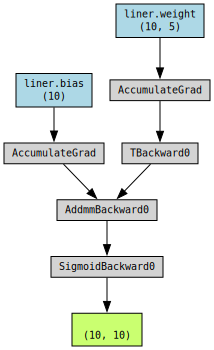

In [73]:
dot = make_dot(y, params=dict(model.named_parameters()))
display(Source(dot.source))